In [1]:
import pandas as pd      #Importing required Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df =pd.read_csv("ds1_train.csv")
df_test = pd.read_csv("ds1_test.csv")

In [4]:
df 

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
...,...,...,...
795,3.724697,23.219963,1.0
796,3.139055,5.970538,1.0
797,2.969095,20.249978,1.0
798,3.957531,27.261970,1.0


In [5]:
df_1 = df[df.y==1]
df_0 = df[df.y==0]

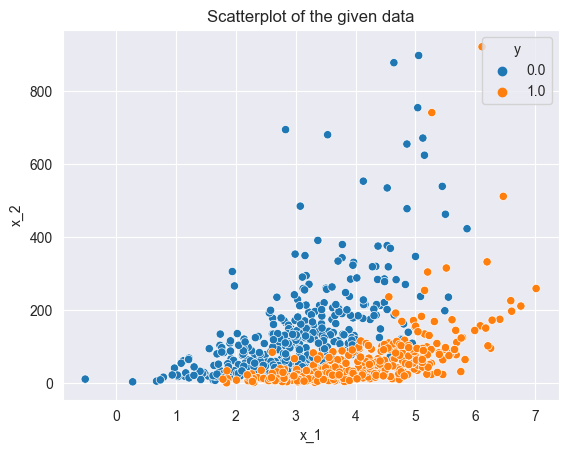

In [6]:
sns.scatterplot(data=df, x=df.x_1, y=df.x_2, hue= df.y)
plt.title("Scatterplot of the given data")
plt.show()

# DATA VISUALISATION AND PREPROCESSING

Text(0.5, 0, 'X2')

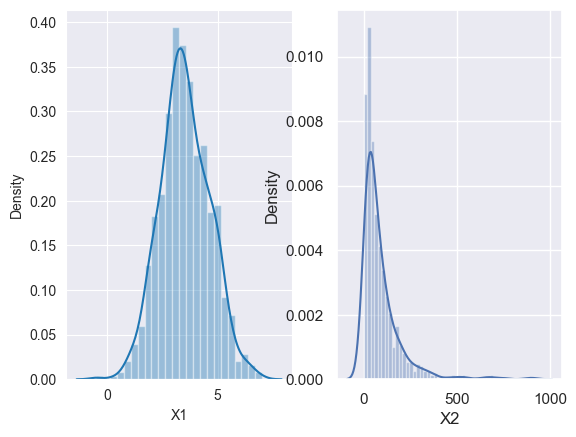

In [7]:
plt.subplot(1, 2 ,1)
sns.set(rc={"figure.figsize":(8,5)})
sns.distplot(df.x_1)
plt.xlabel("X1")

plt.subplot(1, 2 ,2)
sns.distplot(df.x_2)
plt.xlabel("X2")


We can observe that the distribution of variable x2 is not Gaussian, while variable x1 follows a fairly Gaussian distribution. To validate this we will make a QQ plot 

### Q-Q PLOT

A Q-Q (quantile-quantile) plot is a graphical tool used to assess whether a dataset follows a particular theoretical distribution, such as the Gaussian (normal) distribution. It compares the quantiles of the dataset against the quantiles expected from the theoretical distribution. If the data points fall approximately along a straight line in the Q-Q plot, it suggests that the data aligns with the theoretical distribution

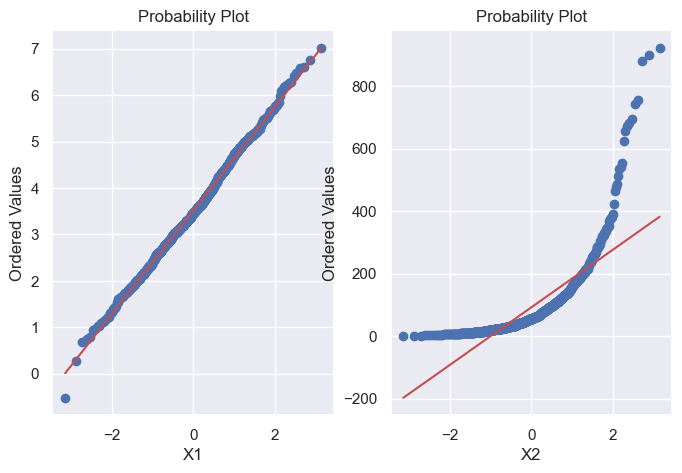

In [8]:
import pylab
import scipy.stats as stats

sns.set(rc={"figure.figsize":(8,5)})

plt.subplot(1, 2 ,1)
stats.probplot(df.x_1, dist = "norm", plot = plt)
plt.xlabel("X1")

plt.subplot(1, 2 ,2)
stats.probplot(df.x_2, dist = "norm", plot = plt)
plt.xlabel("X2")

plt.show()

The Q-Q plot for X1 appears fairly linear, it indicates that the quantiles of X1 are in line with what would be expected from a Gaussian distribution. The data points is clustering around the straight line, suggesting a good fit to the normal distribution. This observation validates my initial statement that X1 follows a fairly Gaussian distribution.

While the Q-Q plot for X2 deviates from a straight line, it means that the quantiles of X2 do not match the expected quantiles from a Gaussian distribution. The points on the plot left skewed. These deviations suggest that the data distribution of X2 is not a Gaussian distribution.

#### Machine learning algorithms often work well and efficiently when the data is normally distributed

Some machine learning algorithms, such as linear regression and Gaussian Naive Bayes, assume that the data follows a Gaussian distribution. If the data is normally distributed many statistical properties gets well defined,These properties make it easier and efficent for algorithms to estimate model parameters and make predictions. Also in optimization-based algorithms, such as gradient descent, the smoothness of the loss curve in case of normal distribution can facilitate faster convergence to the optimal solution.

So we try to pass the values of X2 through a function to make ot closer to normal distribution. As we can see from the distplot the distribution of X2 is left skewed we will pass it through a logarithm transformer


In [9]:
df.x_2_log = np.log(df.x_2)

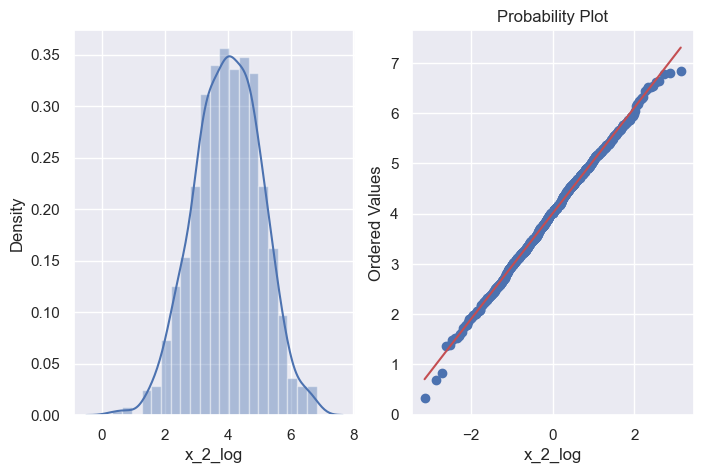

In [10]:
plt.subplot(1, 2 ,1)

sns.distplot(df.x_2_log)
plt.xlabel("x_2_log")

plt.subplot(1, 2 ,2)

stats.probplot(df.x_2_log, dist = "norm", plot = plt)
plt.xlabel("x_2_log")

plt.show()

Now from the Q-Q plot we can see that the curve is fairly normal, we will use this column in further analysis

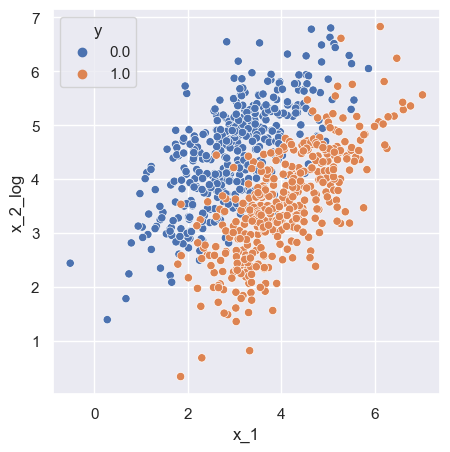

In [11]:
df["x_2_log"]=np.log(df.x_2)
df_test["x_2_log"]=np.log(df_test.x_2)

df_1 = df[df.y==1]
df_0 = df[df.y==0]

sns.set(rc={"figure.figsize":(5, 5)})
sns.scatterplot(data=df, x=df.x_1, y=df.x_2_log, hue= df.y)
plt.xlabel("x_1")
plt.ylabel("x_2_log")
plt.show()

# Handling Outlier


Outliers are data points that are significantly different from the rest of the data. Handling outliers is crucial in any machine learning algorithm because it can significantly influence the model's performance and accuracy as it will try to learn its behavior and will perform worse in normal test data.

Following plot is a Box plot (box-and-whisker plot) which are powerful visualization tool that can to detect outliers in a dataset.

The Box in the plot represents the interquartile range (IQR), which is the range between the 25th(Q1) and 75th(Q3) percentiles of the data.
The Whiskers extend from the box to the most extreme data points within 1.5 times the IQR ie Q1 -1.5 * IQR and Q3 + 1.5 * IQR

Data points outside the whiskers are considered outliers and plotted as individual points.

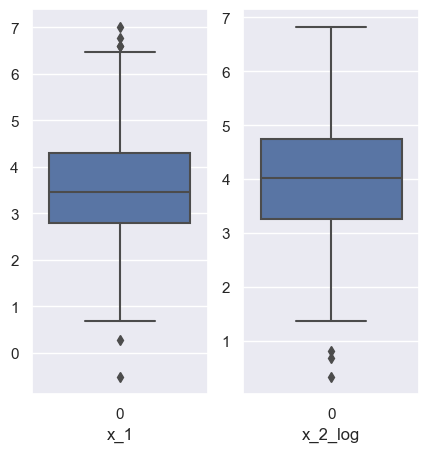

In [12]:

plt.subplot(1, 2 ,1)
sns.boxplot(df.x_1)
plt.xlabel("x_1")


plt.subplot(1, 2 ,2)
sns.boxplot(df.x_2_log)
plt.xlabel("x_2_log")
plt.show()

### Detecting Outliers using IQR method

Following code is to find outliers using IQR Method. I have choosed to delete the outliers as they are less in numbers. Another alternative way could be to cap the data using some upper and lower limit values, but while dry testing algoritms, i found removing outliers was a better idea in this problem 

In [14]:
Q1_1 = df.x_1.quantile(0.25)
Q1_2 = df.x_2_log.quantile(0.25)

Q3_1 = df.x_1.quantile(0.75)
Q3_2 = df.x_2_log.quantile(0.75)

IQR_1 = Q3_1 - Q1_1
IQR_2 = Q3_2 - Q1_2

In [15]:
upper_limit_1 = Q3_1 + 1.5*IQR_1
lower_limit_1 = Q1_1 - 1.5*IQR_1

upper_limit_2 = Q3_2 + 1.5*IQR_2
lower_limit_2 = Q1_2 - 1.5*IQR_2

In [17]:
df.drop(df[(df.x_1 > upper_limit_1) | (df.x_1 < lower_limit_1)|(df.x_2_log < lower_limit_2)].index,inplace=True)

df_1 = df[df.y==1]
df_0 = df[df.y==0]

Our data has been follows a normal distribution, follows similar scale Free of outliers. We are now prepared to train the machine learning model with well-preprocessed data.

# TRAINING THE DATA


## ALGORITHM 1 : LOGISTIC REGRESSION

### Mathematical Understanding

Logistic Regression is a widely used statistical method and a popular machine learning algorithm for binary classification problem. Despite its name, it is used for classification rather than regression. The primary goal of logistic regression is to predict the probability that an input belongs to one of two classes (here 0 / 1). It models the relationship between the input features and the probability of the output belonging to a specific class.
        
Here we want a model a relation of the probabity of a test case being "1" with x_1 ( or x1 ) and x_2_log ( or x2 )
                                             $$w1.x1 + w2 . x2 + w0= Z.$$

We want this linear relation showcase the probabity. So we need to restrict it within 0 and 1. For that we can use a sigmoid function 
                                             $$y= {1\over 1 + e^{-x}}.$$
         
Now,$$sigmoid(Z).$$ gives the probability of test case to be 1. Just like in Linear Regression we need to find a cost function that the algorithm needs to minimise in order to converse to proper w1, w2, and w0                                          

for each training data we can find -log(y) multiplied its probability to get a measure of how much the value predicted probability deviates from its acutal probability.

So, Measure of deviation or loss function can be given as $$\Sigma_{each class}{1 \over n} \Sigma_{i=1}^n -y_i log(y_i).$$
here, we only have 2 classes which are mutually exclusive which means Probabity of 0 = (1 - Probability of 1), Therefore simplifying we get $$J = {1 \over n}\Sigma_{i=1}^n -y_i log(y_i) + (1-y_i) log(1-y_i).$$
As this is a convex function we will use Gradient Decent algorithm to minimise this cost function

#### Gradient Decent Algorithm
Gradient Descent is an optimization algorithm used to minimize a given cost function iteratively by updating the model parameters in the direction of the steepest slope / descent until it converges to optimal parameters

In each iteration we will substract learning rate times partial derivative of cost function with respect to the parameter we are  updating $$ w_{new} = w_{old} - \alpha \frac{\partial J}{\partial w} .$$
depending upon the value of learning rate we will arive to best value of w1, w2, w0. If apha is too small algorithm will need more iterations to converge and if it is too high values will diverge 

### Training and Prediction

In [19]:
X_train = df.drop(columns = ["x_2","y"])
X_test = df_test.drop(columns = ["x_2","y"])

In [20]:
y_train = df["y"]
y_test = df_test["y"]

In [21]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def gradient_decent(X,y,alpha,reg):
    X=np.array(X)
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights - alpha*(np.dot((y_hat-y),X)+ reg * weights/X.shape[0])
        
        
    return weights  

def pred/ nictLR(X, weights):
    y=[]
    for i in X.index :
        if (weights[0]+ X.x_1[i]*weights[1] +X.x_2_log[i]*weights[2]) > 0.5:
            y.append(1)
        else: y.append(0)
    y=np.array(y)
    
    return y
    

In [28]:
weights  =  gradient_decent(X_test, y_test,0.1,0.01)

y_myPredLR = predictLR(X_test, weights)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,f1_score
print("Accuracy",accuracy_score(y_test,y_myPredLR ))
print("Recall",recall_score(y_test,y_myPredLR ))
print("Precision",np.round(precision_score(y_test,y_myPredLR ),2))
print("F1",np.round(f1_score(y_test,y_myPredLR ),2))

Accuracy 0.93
Recall 0.96
Precision 0.91
F1 0.93


This model is performing quite well, achieving high scores across key evaluation metrics in. It has an accuracy of 0.92 and F1 score of 0.92 suggests a balanced trade-off between precision and recall, indicating a reliable and effective classifier overall.

#### Ploting the descision boundary


In [24]:
m1 = -(weights[1]/weights[2])
b1 = -(weights[0]/weights[2])

In [25]:
print(m1)
print(b1)

1.2013083477250681
-0.2685508290797511


In [26]:
x_input = np.linspace(0,7,100)
y_input = m1*x_input + b1

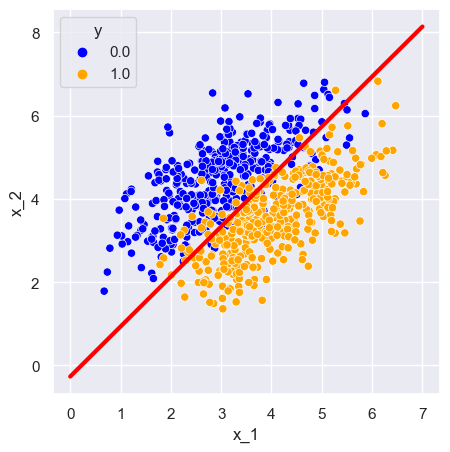

In [27]:
plt.plot(x_input,y_input,color='red',linewidth=3)
sns.scatterplot(data=df, x=df.x_1, y=df.x_2_log, palette=['blue','orange'], hue= df.y)
plt.show()

### Hyperparameter Tuning

In [33]:
for alpha in [0.05,0.1,.15,0.2]:
    for reg in [0.01,0.02,0.03,0.05]:
        weights  =  gradient_decent(X_test, y_test,alpha,reg)
        y_myPredLR = predictLR(X_test, weights)
        
        print("alpha :", alpha , "reg:", reg ," -> " ,"A",accuracy_score(y_test,y_myPredLR )," ","F1",np.round(f1_score(y_test,y_myPredLR ),2))
        
        

alpha : 0.05 reg: 0.01  ->  A 0.94   F1 0.94
alpha : 0.05 reg: 0.02  ->  A 0.94   F1 0.94
alpha : 0.05 reg: 0.03  ->  A 0.94   F1 0.94
alpha : 0.05 reg: 0.05  ->  A 0.94   F1 0.94
alpha : 0.1 reg: 0.01  ->  A 0.93   F1 0.93
alpha : 0.1 reg: 0.02  ->  A 0.82   F1 0.85
alpha : 0.1 reg: 0.03  ->  A 0.94   F1 0.94
alpha : 0.1 reg: 0.05  ->  A 0.93   F1 0.93
alpha : 0.15 reg: 0.01  ->  A 0.93   F1 0.93
alpha : 0.15 reg: 0.02  ->  A 0.8   F1 0.76
alpha : 0.15 reg: 0.03  ->  A 0.9   F1 0.9
alpha : 0.15 reg: 0.05  ->  A 0.94   F1 0.94
alpha : 0.2 reg: 0.01  ->  A 0.94   F1 0.94
alpha : 0.2 reg: 0.02  ->  A 0.92   F1 0.92
alpha : 0.2 reg: 0.03  ->  A 0.91   F1 0.91
alpha : 0.2 reg: 0.05  ->  A 0.94   F1 0.94


By exploring various values of the learning rate and regularization term, we have identified the optimal hyperparameters for training our logistic regression algorithm. Specifically, when using alpha (learning rate) of 0.05 and reg (regularization term) of 0.03, we achieve an impressive accuracy and F1 score of 94%. This demonstrates the significance of hyperparameter tuning in improving the model's performance and its ability to make accurate predictions in the binary classification task.

In [31]:
weights  =  gradient_decent(X_test, y_test,0.05,0.03)

y_myPredLR = predictLR(X_test, weights)

print("Accuracy",accuracy_score(y_test,y_myPredLR ))
print("Recall",recall_score(y_test,y_myPredLR ))
print("Precision",np.round(precision_score(y_test,y_myPredLR ),2))
print("F1",np.round(f1_score(y_test,y_myPredLR ),2))

Accuracy 0.94
Recall 0.94
Precision 0.94
F1 0.94


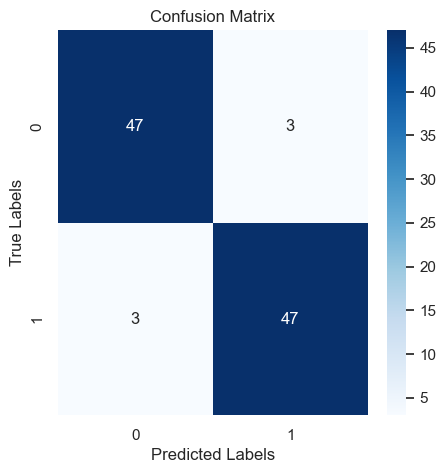

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_myPredLR )

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Here is the confusion matrix to visually display model's performance

## Comparison with Scikit-Learn

In [33]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_Lr=lor.predict(X_test)

In [35]:
print(lor.coef_)
print(lor.intercept_)

[[ 3.17245309 -3.23757368]]
[1.73837755]


In [36]:
print("Accuracy",accuracy_score(y_test,y_Lr))
print("Recall",recall_score(y_test,y_Lr ))
print("Precision",np.round(precision_score(y_test,y_Lr ),2))
print("F1",np.round(f1_score(y_test,y_Lr),2))

Accuracy 0.95
Recall 0.96
Precision 0.94
F1 0.95


### Hyperparameter Tuning using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1,0.5, 1.0,5,10.0],
    'solver': ['liblinear', 'lbfgs']
}


grid_search = GridSearchCV(lor, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_test, y_test)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (Accuracy): 0.9400000000000001


In [38]:
lr =LogisticRegression(C=0.1,penalty='l2', solver ='liblinear' )

In [39]:
y_Lr=lor.predict(X_test)


print("Accuracy",accuracy_score(y_test,y_Lr))
print("Recall",recall_score(y_test,y_Lr ))
print("Precision",np.round(precision_score(y_test,y_Lr ),2))
print("F1",np.round(f1_score(y_test,y_Lr),2))

Accuracy 0.95
Recall 0.96
Precision 0.94
F1 0.95


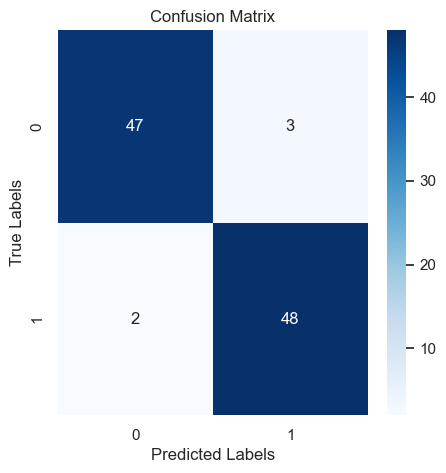

In [43]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_Lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
X_num = np.array(X_test)
y_num = np.array(y_test)

### Ploting decision boundry

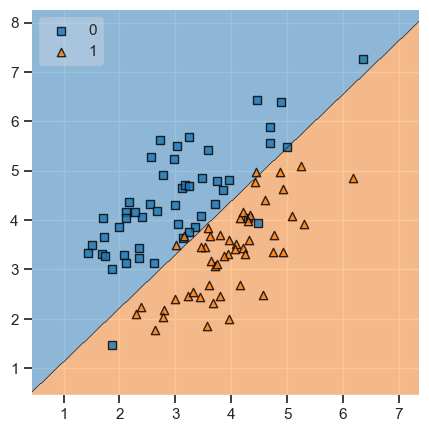

In [45]:
from mlxtend.plotting import plot_decision_regions
lr.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=lr, legend=2)
plt.show()

# ALGORITHM 2  : Gaussian Naive Bayes

### Mathematical Understanding

Naive Bayes is a probabilistic classification algorithm based on the Bayes theorem. It is simple yet powerful classification algorithm, Gaussian Naive Bayes is used when dealing with continuous or numeric input features.

#### Bayes Theorem

Bayes' theorem is a fundamental theorem in statistics. It describes how to update the probability of a hypothesis based on new evidence or observations. $$P(A | B) = (P(B | A) * P(A)) / P(B)$$.To understand the mathematics behind Gaussian Naive Bayes takes take the example of a Model that pridicts gender given its height (say: H = 6 ft)and weight (say :W = 80kg) as input
So, Probability of an individual being male can be represented as $$P(Male | H=6 ft,W=80kg )$$.

Applying Bayes Theorem we get,$$P(Male | H=6 ft,W=80kg ) = {P(H=6 ft,W=80kg | Male)* P(Male)\over P(H=6 ft,W=80kg)}$$
As we are interested in proportionality of probabity we will neglect the dinominator term for simplicity$$P(Male | H=6 ft,W=80kg ) = {P(H=6 ft,W=80kg | Male)* P(Male)}$$

The "Naive" in its name refers to the assumption that features are conditionally independent given the class label, which simplifies the computation.
So we can write $$P(H=6 ft,W=80kg | Male) = P(H=6 ft| Male) * P(W=80 kg| Male)$$
Which simplifies to $$P(Male | H=6 ft,W=80kg ) =  P(H=6 ft| Male) * P(W=80 kg| Male)* P(Male)$$

Now our task is to find P(H=6 ft| Male) and  P(W=80 kg| Male). This is where Gaussian Distribution comes to picture

#### Gaussian Distribution

Gaussian distribution, also known as the normal distribution, is a continuous probability distribution that is widely used in statistics

The Gaussian distribution is characterized by its bell-shaped curve, which is symmetric around the mean (average) value. The curve is centered at the mean, and it tapers off towards both ends.

The distribution is defined by two parameters - the mean (μ) and the standard deviation (σ). The mean represents the central value around which the data is concentrated, while the standard deviation determines the spread or dispersion of the data points

##### Probability Density Function 
$$f(x; μ, σ) = {1 \over σ  \sqrt{2π}} * e^{-(x - μ)^2 \over σ^2}$$

x is the random variable for which we want to find the probability density.

μ is the mean of the distribution.

σ is the standard deviation of the distribution.

So mean and the Standard Deviation can be found out from the dataset of Height and Weight catagorised by gender.
$$If, P(H=6 ft,W=80kg | Male) > P(H=6 ft,W=80kg | Female) $$.
We will catagorise it as Male else a Female 

### Training and Prediction

At first I would find the probability density function 

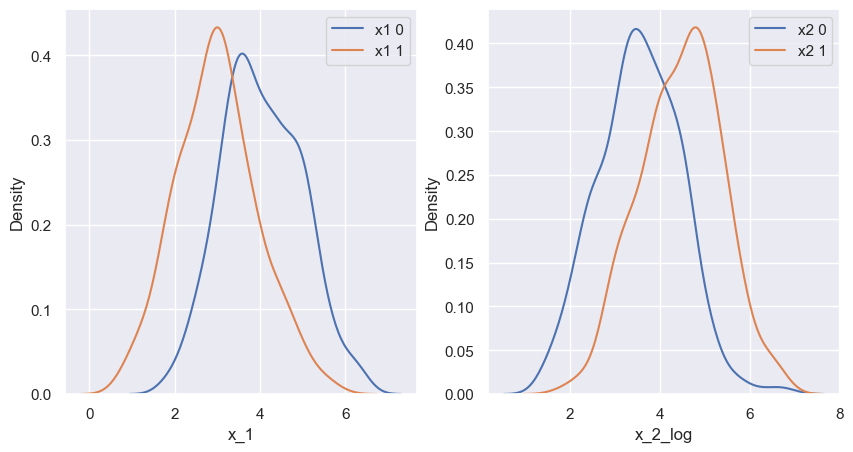

In [40]:
sns.set(rc={"figure.figsize":(10,5)})

plt.subplot(1, 2 ,1)
sns.distplot(df_1.x_1, hist = False )
sns.distplot(df_0.x_1, hist = False )
plt.xlabel("x_1")
plt.legend(['x1 0', 'x1 1'])


plt.subplot(1, 2 ,2)
sns.distplot(df_1.x_2_log, hist = False )
sns.distplot(df_0.x_2_log, hist = False )
plt.xlabel("x_2_log")
plt.legend(['x2 0', 'x2 1'])


As the Distribution is made guassian we will find separate mean and standard deviation of x_1 with y=0 & y=1  and  x_2_log with y=0 & y=1  to characterize the Probability distribution plot 

In [41]:
mean_x_1_1 = df_1.x_1.mean()
mean_x_1_0 = df_0.x_1.mean()

mean_x_2_log_1=df_1.x_2_log.mean()
mean_x_2_log_0=df_0.x_2_log.mean()

In [42]:
std_x_1_1 =  df_1.x_1.std()
std_x_1_0  = df_0.x_1.std()

std_x_2_log_1=df_1.x_2_log.std()
std_x_2_log_0=df_0.x_2_log.std()

In [43]:
prob0= df_0.shape[0]/df.shape[0]
prob1= df_1.shape[0]/df.shape[0]

In [44]:
def Gprobability(x,mean, std):
    return  (1/(std * np.sqrt(2*np.pi)))*np.exp(-0.5*np.square(x-mean/std))

def GNB(x1 , x2):
    probability0 = prob0*Gprobability(x1,mean_x_1_0, std_x_1_0)*Gprobability(x2,mean_x_2_log_0,std_x_2_log_0)
    probability1 = prob1*Gprobability(x1,mean_x_1_1, std_x_1_1)*Gprobability(x2,mean_x_2_log_1,std_x_2_log_1)
    
    if probability0 >= probability1: return 0
    else : return 1 

def PredictGNB(X):
    y_mypredGNB=[]
    for i in df_test.index:
        y_mypredGNB.append(GNB(X.x_1[i], X.x_2_log[i]))
        
    y_mypredGNB = np.array(y_mypredGNB)
    return  y_mypredGNB

In [51]:
y_mypredGNB=PredictGNB(X_test)

In [52]:
y_mypredGNB

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
print("Accuracy",accuracy_score(y_test,y_mypredGNB))
print("Recall",recall_score(y_test,y_mypredGNB ))
print("Precision",np.round(precision_score(y_test,y_mypredGNB ),2))
print("F1",np.round(f1_score(y_test,y_mypredGNB),2))

Accuracy 0.9
Recall 1.0
Precision 0.83
F1 0.91


This classifier also seems to be doing an excellent job across the board. It has high accuracy, perfect recall, and relatively high precision, resulting in a high F1 score.

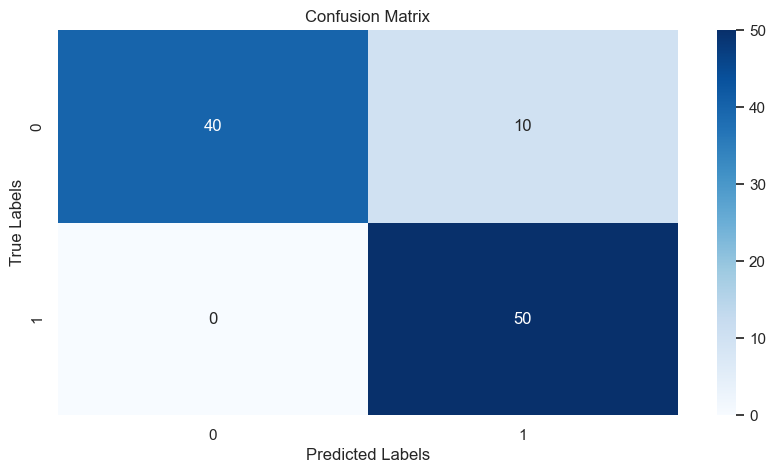

In [54]:

cm = confusion_matrix(y_test,y_mypredGNB)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Comparison with Scikit-Learn

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
y_SKpredGNB = nb.predict(X_test)

In [57]:
print("Accuracy",accuracy_score(y_test,y_SKpredGNB))
print("Recall",recall_score(y_test,y_SKpredGNB ))
print("Precision",np.round(precision_score(y_test,y_SKpredGNB ),2))
print("F1",np.round(f1_score(y_test,y_SKpredGNB),2))

Accuracy 0.94
Recall 0.96
Precision 0.92
F1 0.94


In comparition to my GNB Classifier this is superior. It has a higher accuracy, indicating that it makes more correct predictions overall. Additionally, it maintains an impressive recall, capturing a significant portion of the positive instances. The precision is also high, implying that the classifier is precise when predicting positive instances, leading to fewer false positives. The F1 score of 0.94 further confirms the classifier's strong performance in handling the trade-off between precision and recall.

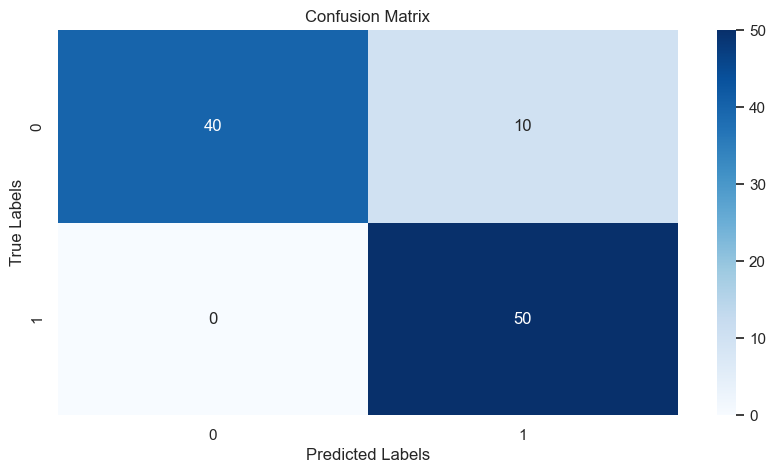

In [58]:

cm = confusion_matrix(y_test,y_mypredGNB)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Ploting decision boundry

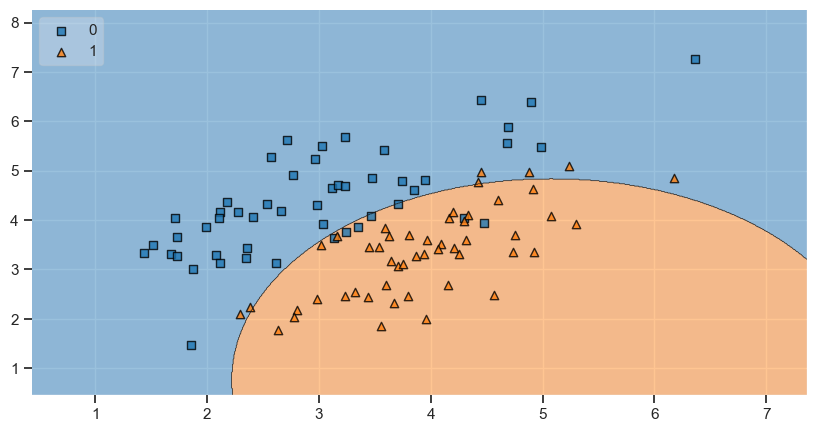

In [59]:
from mlxtend.plotting import plot_decision_regions
nb.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=nb, legend=2)
plt.show()

# ALGORITHM 3 : K Nearest Neighbours

### Mathematical Understanding

K Nearest Neighbours is like a mathematical embodiment of the saying by Jim Rohn, "You are the average of the five people you spend the most time with." Just as this saying suggests that a person's characteristics are influenced by those around them, KNN operates similarly in predicting the value of a data point by looking at the its K closest neighbors. Just as our behavior might be influenced by our closest friends, KNN looks at the "neighbors" with the most similar features to make predictions.


###### How to find closest neighbors? 

Simple eucledian distance or Manhattan distance can be the measure of closeness of 2 data points, we will take K-closet data points to predict the test data, according to the given dataset 
$$ EucledianDistance = \sqrt{(x1-y1)^2+(x2-y2)^2} $$ 
$$ ManhattanDistance = |x1-y1|+|x2-y2| $$  
We need to just sort the distance^2 and select K points with least distance

###### How to predict? 

For Prediction we just need to determine the majority class among the K neighbors this involves counting the occurrences of each class label in the K neighbors and selecting the class with the highest count as the predicted class for the data point.


Value of K can be twicked for an optimal value

In [51]:
def distance(x1,x2,y1,y2,n):
    if n == 'e':
        return np.sqrt(np.square(x1-y1)+np.square(x2-y2))
    elif n == 'm' :
        return np.abs(x1-y1)+np.abs(x2-y2)

def knn_predict(y1,y2,k,n):
    distances= []
    for i in df.index:
        distances.append([(distance(df.x_1[i],df.x_2_log[i],y1,y2,n)),i])
   
    distances.sort()

    num_0 = 0
    num_1 = 0
    
    for i in distances[:k]:
       
        if df.y[i[1]] == 0: num_0+=1
        else : num_1+=1
    
    if num_0 > num_1 : return 0
    else : return 1 
       
def KKNClassifier(X,k,n):
    y_pred= []
    for i in df_test.index:
        y_pred.append(knn_predict(X.x_1[i], X.x_2_log[i], k,n))
    
    y_pred=np.array(y_pred)
    return y_pred    

In [52]:
y_myKNNpred = KKNClassifier(X_test,3,'m')

In [53]:
y_myKNNpred 

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
print("Accuracy",accuracy_score(y_test,y_myKNNpred))

Accuracy 0.91


In [55]:
for i in ['e','m']:
    for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        y_myKNNpred = KKNClassifier(X_test,k,i)
        print("distance", i ,";", "k = ", k ," : ","Accuracy",accuracy_score(y_test,y_myKNNpred),"F1",np.round(f1_score(y_test,y_myKNNpred),2))

distance e ; k =  1  :  Accuracy 0.88 F1 0.88
distance e ; k =  2  :  Accuracy 0.87 F1 0.88
distance e ; k =  3  :  Accuracy 0.91 F1 0.91
distance e ; k =  4  :  Accuracy 0.9 F1 0.9
distance e ; k =  5  :  Accuracy 0.91 F1 0.91
distance e ; k =  6  :  Accuracy 0.92 F1 0.92
distance e ; k =  7  :  Accuracy 0.92 F1 0.92
distance e ; k =  8  :  Accuracy 0.92 F1 0.92
distance e ; k =  9  :  Accuracy 0.92 F1 0.92
distance e ; k =  10  :  Accuracy 0.91 F1 0.91
distance e ; k =  11  :  Accuracy 0.91 F1 0.91
distance e ; k =  12  :  Accuracy 0.91 F1 0.91
distance e ; k =  13  :  Accuracy 0.92 F1 0.92
distance e ; k =  14  :  Accuracy 0.91 F1 0.91
distance e ; k =  15  :  Accuracy 0.91 F1 0.91
distance m ; k =  1  :  Accuracy 0.87 F1 0.87
distance m ; k =  2  :  Accuracy 0.87 F1 0.88
distance m ; k =  3  :  Accuracy 0.91 F1 0.91
distance m ; k =  4  :  Accuracy 0.92 F1 0.92
distance m ; k =  5  :  Accuracy 0.93 F1 0.93
distance m ; k =  6  :  Accuracy 0.93 F1 0.93
distance m ; k =  7  :  Accura

So we can see for k = 7 and taking euclidian distance there is an improvement in Accuracy and F1 score , we will finalise our algorithm with K = 7 and n = e

In [56]:
print("Accuracy",accuracy_score(y_test,y_myKNNpred))
print("Recall",recall_score(y_test,y_myKNNpred ))
print("Precision",np.round(precision_score(y_test,y_myKNNpred),2))
print("F1",np.round(f1_score(y_test,y_myKNNpred),2))

Accuracy 0.91
Recall 0.94
Precision 0.89
F1 0.91


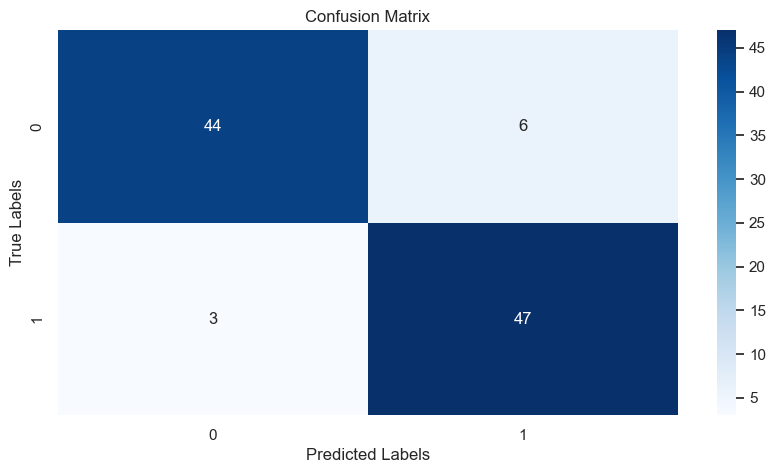

In [57]:
cm = confusion_matrix(y_test,y_myKNNpred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Comparison with Scikit-Learn

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [60]:
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred_knn))

Accuracy 0.91


### Hyperparameter Tuning using GridSearchCV

In [61]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [68]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Model Accuracy: 0.92


In [69]:
knn = KNeighborsClassifier(n_neighbors=9 , p = 2, weights = 'uniform')

knn.fit(X_train, y_train)

y_SKpredKNN = knn.predict(X_test)


In [70]:
print("Accuracy",accuracy_score(y_test,y_SKpredKNN))
print("Recall",recall_score(y_test,y_SKpredKNN))
print("Precision",np.round(precision_score(y_test,y_SKpredKNN),2))
print("F1 Score",np.round(f1_score(y_test,y_SKpredKNN),2))

Accuracy 0.92
Recall 0.94
Precision 0.9
F1 Score 0.92


### Ploting decision boundry

In [71]:
knn.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=knn, legend=2)
plt.show()

NameError: name 'plot_decision_regions' is not defined

# ALGORITHM 4 :   Gaussian Discriminant Analysis

In [74]:
def Cov_matrix(data):

    
    num_samples = len(data)
    
    x1_mean=0
    x2_mean=0  
    
    
    for i in data.index:
        x1_mean += data.loc[i][0]
        x2_mean += data.loc[i][1]
    
    x1_mean = x1_mean / num_samples
    x2_mean = x2_mean / num_samples
    
   
    x_1_1=0
    x_1_2=0
    x_2_1=0
    x_2_2=0
    for i in data.index:
        x_1_1 +=(data.loc[i][0] - x1_mean) * (data.loc[i][0] - x1_mean)
        x_1_2 +=(data.loc[i][0] - x1_mean) * (data.loc[i][1] - x2_mean)
        x_2_1 +=(data.loc[i][1] - x2_mean) * (data.loc[i][0] - x1_mean)
        x_2_2 +=(data.loc[i][1] - x2_mean) * (data.loc[i][1] - x2_mean)
    
    x_1_1=x_1_1/(num_samples - 1)
    x_1_2=x_1_2/(num_samples - 1)
    x_2_1=x_2_1/(num_samples - 1)
    x_2_2=x_2_2/(num_samples - 1)
    

   
    covariance_matrix = [
        [x_1_1,x_1_2],
        [x_2_1,x_2_2]
    ]
    
    return x1_mean,x2_mean,covariance_matrix
    
    


label_0 = y_train[y_train == 0].index
label_1 = y_train[y_train == 1].index

def GDA_pridict(x):
    
    x1_0mean,x2_0mean,covariance_0matrix=Cov_matrix( X_train.loc[label_0])
    x1_1mean,x2_1mean,covariance_1matrix=Cov_matrix( X_train.loc[label_1])
    

   
    A = x -np.array([x1_0mean,x2_0mean])
    B = x -np.array([x1_1mean,x2_1mean])
 
    
    
    e0= np.matmul((np.matmul(A,covariance_0matrix)),np.transpose(A))
    e1= np.matmul((np.matmul(B,covariance_1matrix)),np.transpose(B))
    
    
    
    pro0 =1/np.sqrt(2*np.pi*np.linalg.det(covariance_0matrix))*np.exp(-0.5*e0)
    pro1 =1/np.sqrt(2*np.pi*np.linalg.det(covariance_1matrix))*np.exp(-0.5*e1)
    
    if pro0 > pro1:
        return 0
    else: return 1
    
    
def myGDAClassifier(X):
    y_mypred_GDA=[]
   
    for i in X.index:
        y_mypred_GDA.append(GDA_pridict(X.loc[i]))
    
    return np.array(y_mypred_GDA)

In [73]:
y_mypredGDA= myGDAClassifier(X_test)

NameError: name 'myGDAClassifier' is not defined

In [72]:
print("Accuracy",accuracy_score(y_test,y_mypredGDA))
print("Recall",recall_score(y_test,y_mypredGDA))
print("Precision",np.round(precision_score(y_test,y_mypredGDA),2))
print("F1",np.round(f1_score(y_test,y_mypredGDA),2))

NameError: name 'y_mypredGDA' is not defined


# ALGORITHM 5 :  K MEANS CLUSTERING

### Mathematical Understanding

K-means clustering is an unsupervised machine learning algorithm used for partitioning data into K clusters based on similarities among data points. The objective of K-means is to group similar data points together while keeping the data points in different clusters as dissimilar as possible. It is a popular and efficient method for clustering data in various fields, such as data mining, image processing, pattern recognition, and more.


We select the number of clusters, K, here it is 2. and I choose proper centers for my particular clusters initial centers, which will serve as the starting points for the clusters.

For each data point in the dataset, I calculated the Euclidean distance from that point to the two centers. Assign the data point to the cluster represented by the nearest center.

After all data points have been assigned to clusters, I recalculated the center for each cluster. The new centers for each cluster is the mean of all the data points assigned to that cluster.

Iterated this over desired epochs till convergence.


### Training and Prediction

In [81]:
centers = np.array([[4,2],[1.5,4]])

In [82]:
def distance(pt1 ,pt2):
    return np.square(pt1[0]-pt2[0])+np.square(pt1[1]-pt2[1])

def update_clusters(centres, data):
    
    for i in range(len(data)):  
        
        dist1 = distance(np.array([data.T[0][i],data.T[1][i]]),centers[0])
        dist2 = distance(np.array([data.T[0][i],data.T[1][i]]),centers[1])
       
        if dist1>dist2 :
            data.T[2][i] = 0 
            
        else :
            data.T[2][i] = 1 
            
    return data

def update_centres(centres, data):
    l1=[]
    l2=[]
    for i in range(len(data)): 
        if data.T[2][i]==0 :
            l1.append([data.T[0][i],data.T[1][i]])
        else : l2.append([data.T[0][i],data.T[1][i]])
    
    l1 = np.array(l1)
    l2 = np.array(l2)
    
    
    return np.array([[l1.T[0].mean(),l1.T[1].mean()],[l2.T[0].mean(),l2.T[1].mean()]])


In [83]:
def predictKMeans(X_train , X_test ,epochs, centers):
    
    X_Kmeans =np.array(X_train)
    X_Kmeans=np.insert(X_Kmeans,2,1,axis=1)

 
    
    for epochs in range(epochs):
        X_Kmeans = update_clusters(centers, X_Kmeans)
        centers = update_centres(centers, X_Kmeans)
    
    y_pred=[]
    
    X_test=np.array(X_test)
  

    for i in range(len(X_test)):  
        
        dist1 = distance(np.array([X_test.T[0][i],X_test.T[1][i]]),centers[0])
        dist2 = distance(np.array([X_test.T[0][i],X_test.T[1][i]]),centers[1])
       
        if dist1>dist2 :
             y_pred.append(1)
            
        else :
             y_pred.append(0)
            
    return np.array(y_pred)


In [84]:
y_mypredKmeans = predictKMeans(X_train , X_test ,5,centers)

In [85]:
print("Accuracy",accuracy_score(y_test,y_mypredKmeans))
print("Recall",recall_score(y_test,y_mypredKmeans))
print("Precision",np.round(precision_score(y_test,y_mypredKmeans),2))
print("F1",np.round(f1_score(y_test,y_mypredKmeans),2))

Accuracy 0.9
Recall 0.92
Precision 0.88
F1 0.9


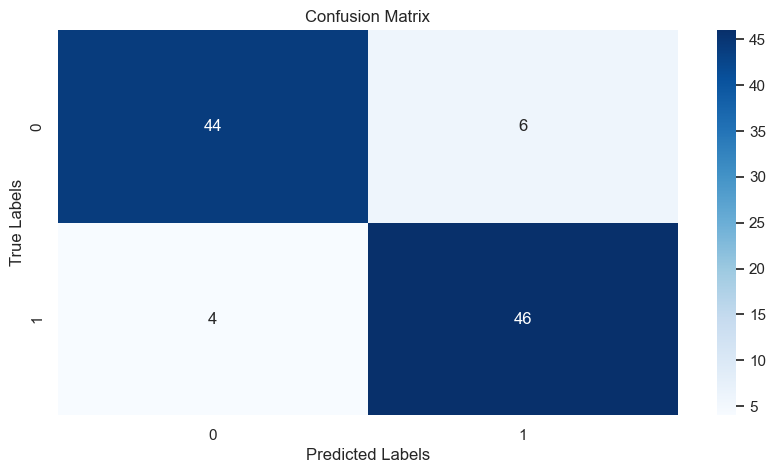

In [73]:
cm = confusion_matrix(y_test,y_mypredKmeans)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ENSEMBLE OF ALGORITHM 

Ensemble learning is a machine learning technique that combines multiple individual models (learners) to create a more accurate and robust predictive model. It leverages the wisdom of the crowd by aggregating the predictions of diverse models, resulting in improved performance compared to any single model. There are several ensemble learning algorithms, each with its unique approach and benefits. Let's explore four popular ensemble learning algorithms: Voting, Bagging, Boosting, and Stacking.

### Voting:
Voting is a straightforward ensemble method that combines the predictions of multiple models to make the final prediction. There are two main types of voting: Hard Voting and Soft Voting.

##### Hard Voting: 
In hard voting, each model in the ensemble casts a "vote" for a specific class label, and the final prediction is determined by majority voting. The class that receives the most votes becomes the ensemble's prediction.

##### Soft Voting:
In soft voting, instead of counting class labels, the models calculate the probability of each class for a given input. The final prediction is obtained by averaging the class probabilities across all models and selecting the class with the highest average probability.

Voting works well when the individual models are diverse and have varying strengths. It is commonly used in classification tasks.

### Bagging (Bootstrap Aggregating):
Bagging is an ensemble technique that reduces variance and improves model generalization. It involves training multiple instances of the same base model independently on different random subsets of the training data. Each model in the ensemble has an equal weight, and the final prediction is typically obtained by averaging (for regression) or voting (for classification) the predictions of all the individual models.

The most popular bagging algorithm is the Random Forest, which uses decision trees as the base models. Random Forests create diverse decision trees by training them on random subsets of features and samples. The combination of multiple trees reduces overfitting and increases prediction accuracy.

### Boosting:
Boosting is a sequential ensemble technique that aims to correct the errors made by its predecessors. Unlike bagging, boosting assigns varying weights to the instances in the training data, emphasizing the importance of difficult-to-classify examples.

The boosting process works as follows: each model in the ensemble is trained iteratively, and each subsequent model focuses on improving the performance of its predecessors. Misclassified instances are given higher weights, allowing the subsequent models to pay more attention to them. This adaptive approach leads to a stronger final model.

Some popular boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost (Extreme Gradient Boosting). These algorithms iteratively build models and combine them, resulting in increased accuracy and robustness.

### Stacking:
Stacking (Stacked Generalization) is a more advanced ensemble technique that involves training multiple models, often with different algorithms, and then using another model (meta-learner) to combine their predictions. Unlike bagging and boosting, stacking takes a more hierarchical approach.

The process involves splitting the training data into multiple subsets. Each base model is trained on a different subset and makes predictions on a hold-out validation set. These predictions become the input features for the meta-learner, which learns to make the final prediction based on the outputs of the base models.

Stacking allows the ensemble to benefit from the strengths of various models and can lead to even better performance than individual ensemble methods alone

## My Custom Ensemble

Through a detialed analysis of model metrics, I have devised a simple Ensemble of algorithm. This approach focuses on leveraging Precision and Recall values as the primary criteria for decision-making. The core concept revolves around differentiating between cases when the algorithm predicts "1" and when it predicts "0."

When the algorithm predicts "1," we prioritize the model's Recall value. Recall measures the proportion of true positive instances correctly identified by the model. By emphasizing on the algorithm with highest Recall, we ensure that the ensemble prioritizes correctly identifying positive instances, minimizing false negatives, and maximizing the algorithm's ability to capture all relevant data points of interest.

On the other hand, when the algorithm predicts "0," we assess its Precision value. Precision gauges the proportion of true positive instances out of all positive predictions made by the model. By giving preference to the algorithm with the highest Precision, we aim to minimize false positives and enhance the precision of the ensemble in correctly identifying negative instances.

### Code

In [89]:
np.array(y_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Logistic Regression

In [90]:
y_myPredLR
recall_LR=recall_score(y_test,y_myPredLR)
precis_LR=np.round(precision_score(y_test,y_myPredLR),2)

#### Guassian Naive Bayes


In [91]:
y_mypredGNB

recall_GNB=recall_score(y_test,y_mypredGNB)
precis_GNB=np.round(precision_score(y_test,y_mypredGNB),2)

NameError: name 'y_mypredGNB' is not defined

#### K-Nearnest Neighbors

In [92]:
y_myKNNpred 

recall_KNN=recall_score(y_test,y_myKNNpred)
precis_KNN=np.round(precision_score(y_test,y_myKNNpred),2)

#### Gaussian Discriminant Analysis

In [93]:
y_mypredGDA

recall_GDA=recall_score(y_test,y_mypredGDA)
precis_GDA=np.round(precision_score(y_test,y_mypredGDA),2)


NameError: name 'y_mypredGDA' is not defined

#### K-Means

In [94]:
y_mypredKmeans

recall_KM=recall_score(y_test,y_mypredKmeans)
precis_KM=np.round(precision_score(y_test,y_mypredKmeans),2)


In [95]:
y=[y_myPredLR,y_mypredGNB,y_myKNNpred,y_mypredGDA,y_mypredKmeans]
y=np.array(y)
recall=[recall_LR,recall_GNB,recall_KNN,recall_GDA,recall_KM]
precis=[precis_LR,precis_GNB,precis_KNN,precis_GDA,precis_KM]
y=y.T

NameError: name 'y_mypredGNB' is not defined

In [88]:
power = 20
y_ensemble = []
for prediction_list in y:
    
    
    y_score = 0 
    for i in range(5):
        if prediction_list[i] == 0:
            y_score+=precis[i]**power * -1
        else :
            y_score+=precis[i]**power * 1
    
    if y_score>0:
        y_ensemble.append(1)
    else:
        y_ensemble.append(0)                   
        
y_ensemble=np.array(y_ensemble)

NameError: name 'y' is not defined

In [82]:
y_ensemble

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
print("Accuracy",accuracy_score(y_test,y_ensemble))
print("Recall",recall_score(y_test,y_ensemble))
print("Precision",np.round(precision_score(y_test,y_ensemble),2))
print("F1 Score",np.round(f1_score(y_test,y_ensemble),2))

Accuracy 0.94
Recall 0.94
Precision 0.94
F1 Score 0.94


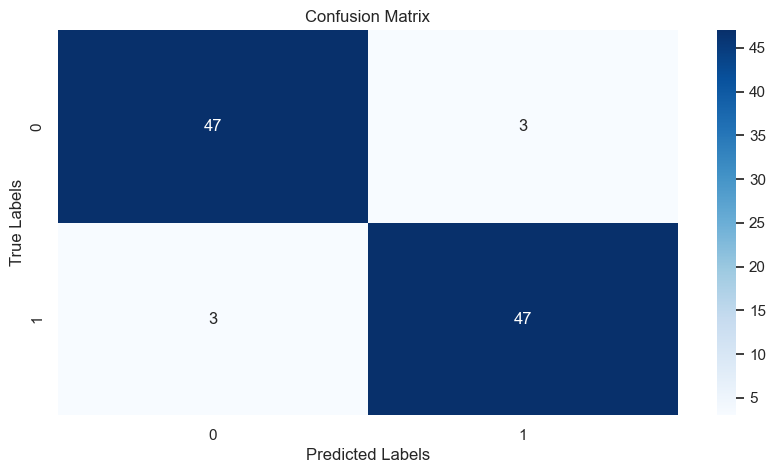

In [84]:
cm = confusion_matrix(y_test,y_ensemble)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This ensemble achieved impressive performance, exhibiting an Accuracy, Recall, Precision, and F1 Score of 0.94. This outperforms the algorithms it is made of in one or many parameters.

The ensemble's exceptional balance between Recall and Precision is noteworthy. With both metrics at 0.94, it effectively identifies positive instances while minimizing false positives and false negatives. This equilibrium is crucial in real-world applications, ensuring accurate classification and reducing the risk of misclassifications.

The high Recall indicates that a vast majority of positive instances are correctly identified. Simultaneously, the high Precision means that when the ensemble predicts a positive class, it is accurate 94% of the time, minimizing false positives and increasing reliability.

The F1 Score of 0.94 confirms the ensemble's capability to handle imbalanced datasets effectively, showcasing its overall robustness in accurate classification.


# Exploring other Ensemble Learning Algoritmns

## RANDOM FOREST

### SKlearn Implementation with GridSearchCV

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy 0.89
Recall 0.92
Precision 0.87
F1 Score 0.89


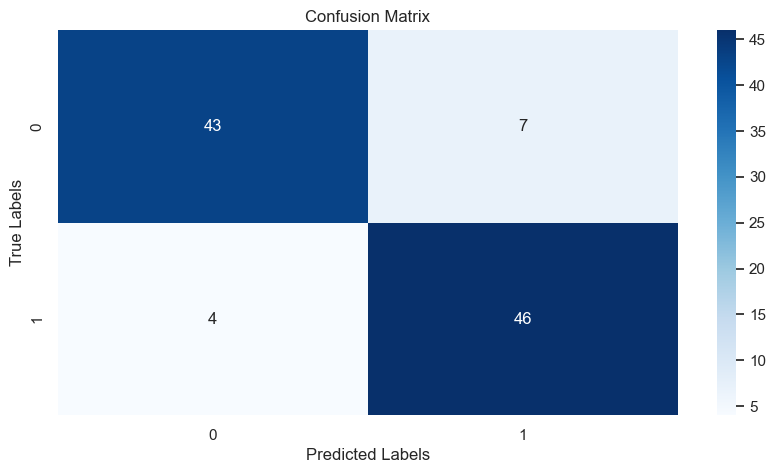

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Precision",np.round(precision_score(y_test,y_pred),2))
print("F1 Score",np.round(f1_score(y_test,y_pred),2))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
X_num = np.array(X_test)
y_num = np.array(y_test)

### Ploting decision boundry

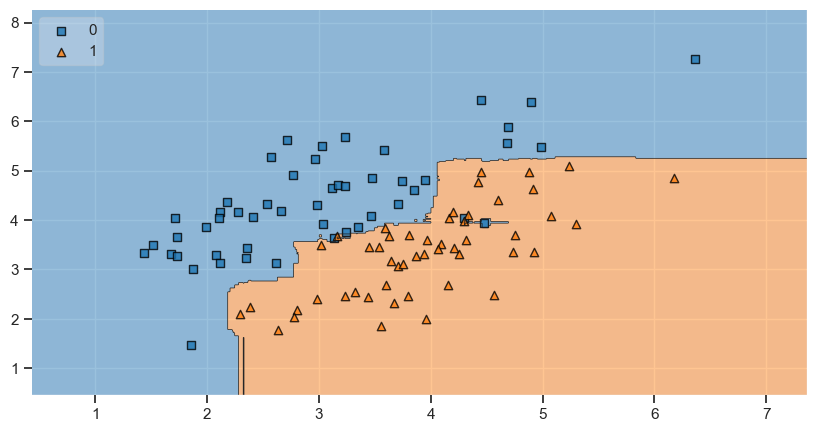

In [87]:

rf.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=rf, legend=2)
plt.show()

# ADABOOSTING


### SKlearn Implementation with GridSearchCV

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy 0.89
Recall 0.94
Precision 0.85
F1 Score 0.9


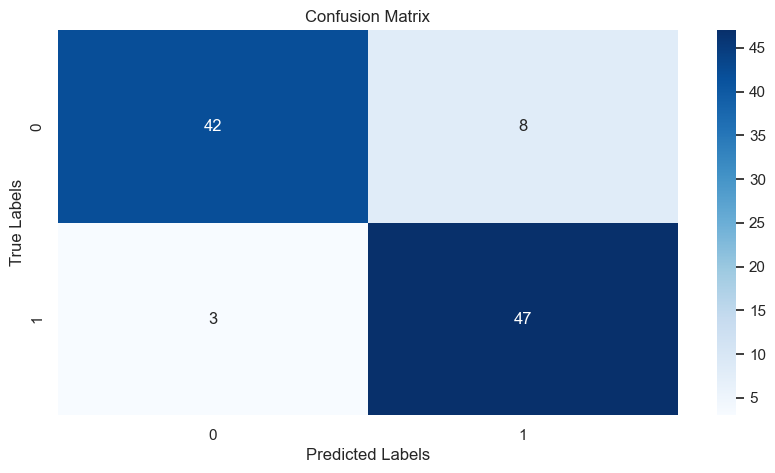

In [88]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_adb = grid_search.best_estimator_

y_pred = best_adb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Precision",np.round(precision_score(y_test,y_pred),2))
print("F1 Score",np.round(f1_score(y_test,y_pred),2))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


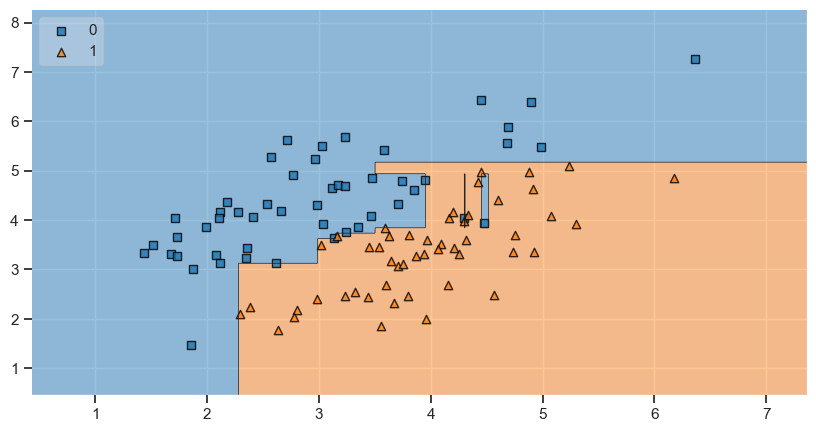

In [89]:
from mlxtend.plotting import plot_decision_regions
adb.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=adb, legend=2)
plt.show()

# GRADIENT BOOSTING

### SKlearn Implementation with GridSearchCV

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy 0.89
Recall 0.92
Precision 0.87
F1 Score 0.89


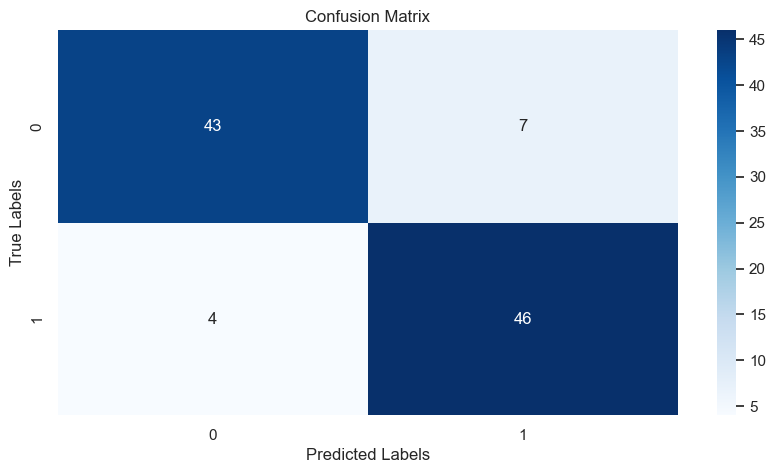

In [91]:
gb = GradientBoostingClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_gb = grid_search.best_estimator_


y_pred = best_gb.predict(X_test)



print("Best Hyperparameters:", grid_search.best_params_)


print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Precision",np.round(precision_score(y_test,y_pred),2))
print("F1 Score",np.round(f1_score(y_test,y_pred),2))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



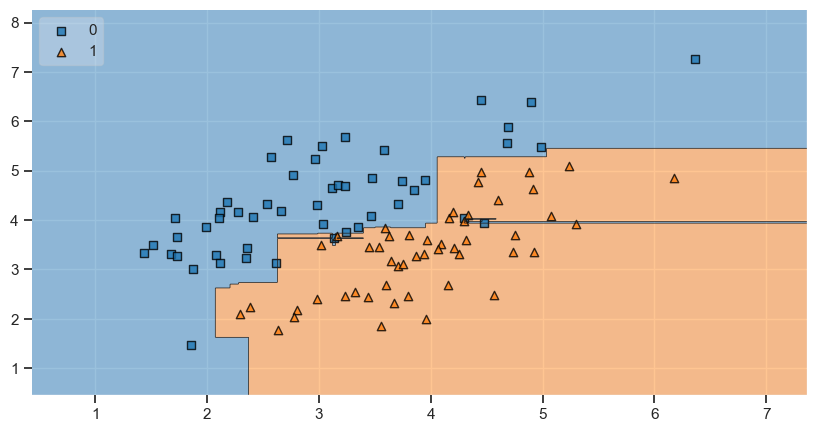

In [92]:

gb.fit(X_test, y_test)
plot_decision_regions(X_num, y_num.astype(np.int_), clf=gb, legend=2)
plt.show()

# XG-BOOST

Accuracy 0.88
Recall 0.9
Precision 0.87
F1 Score 0.88


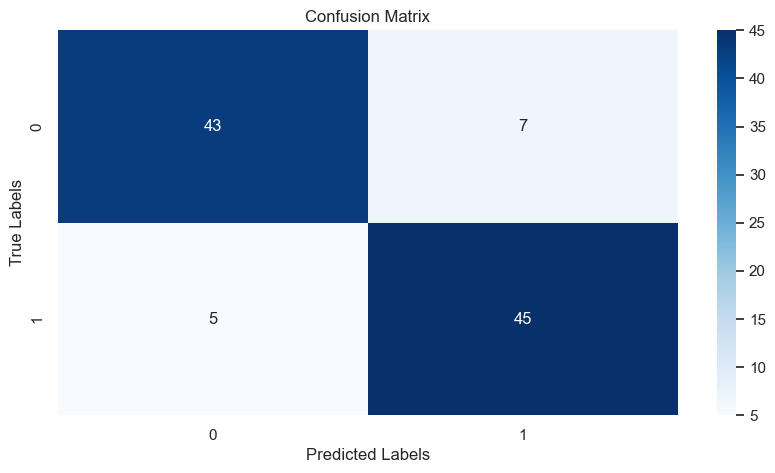

In [93]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_


y_pred = best_xgb.predict(X_test)


print("Accuracy",accuracy_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("Precision",np.round(precision_score(y_test,y_pred),2))
print("F1 Score",np.round(f1_score(y_test,y_pred),2))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# DOING THE SAME PROCESS FOR THE OTHER DATASET

In [94]:
df =pd.read_csv("ds2_train.csv")
df_test = pd.read_csv("ds2_test.csv")

In [95]:
df_1 = df[df.y==1]
df_0 = df[df.y==0]

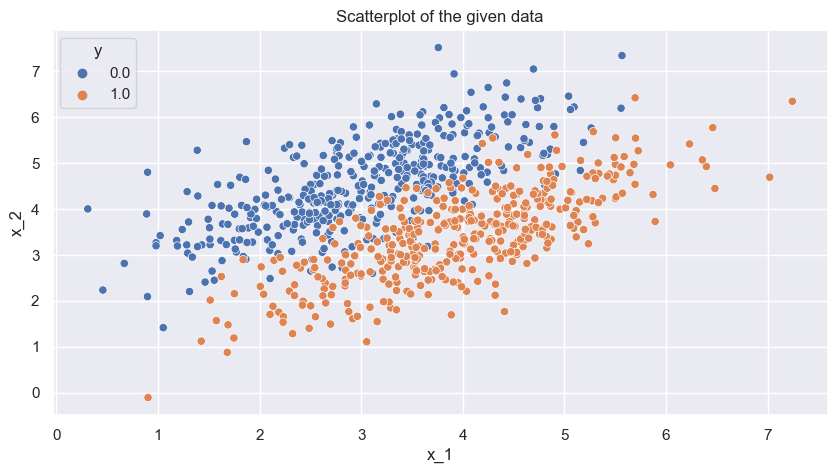

In [96]:
sns.scatterplot(data=df, x=df.x_1, y=df.x_2, hue= df.y)
plt.title("Scatterplot of the given data")
plt.show()

# DATA VISUALISATION AND PREPROCESSING

Text(0.5, 0, 'X2')

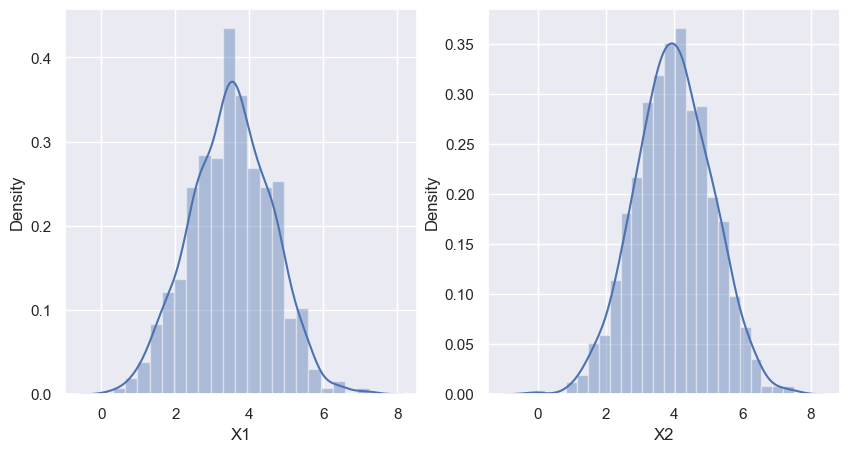

In [97]:
plt.subplot(1, 2 ,1)
sns.set(rc={"figure.figsize":(8,5)})
sns.distplot(df.x_1)
plt.xlabel("X1")

plt.subplot(1, 2 ,2)
sns.distplot(df.x_2)
plt.xlabel("X2")


### QQ-PLOT

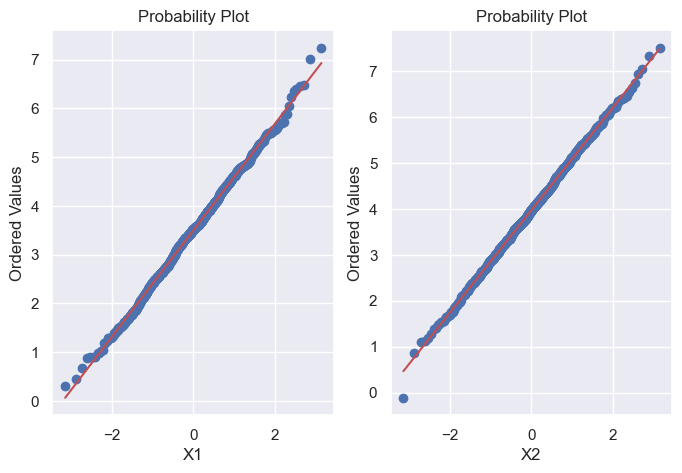

In [98]:
sns.set(rc={"figure.figsize":(8,5)})

plt.subplot(1, 2 ,1)
stats.probplot(df.x_1, dist = "norm", plot = plt)
plt.xlabel("X1")

plt.subplot(1, 2 ,2)
stats.probplot(df.x_2, dist = "norm", plot = plt)
plt.xlabel("X2")

plt.show()

This dataset is Fairly Guassian

In [99]:
Q1_1 = df.x_1.quantile(0.25)
Q1_2 = df.x_2.quantile(0.25)

Q3_1 = df.x_1.quantile(0.75)
Q3_2 = df.x_2.quantile(0.75)

IQR_1 = Q3_1 - Q1_1
IQR_2 = Q3_2 - Q1_2

In [100]:
upper_limit_1 = Q3_1 + 1.5*IQR_1
lower_limit_1 = Q1_1 - 1.5*IQR_1

upper_limit_2 = Q3_2 + 1.5*IQR_2
lower_limit_2 = Q1_2 - 1.5*IQR_2

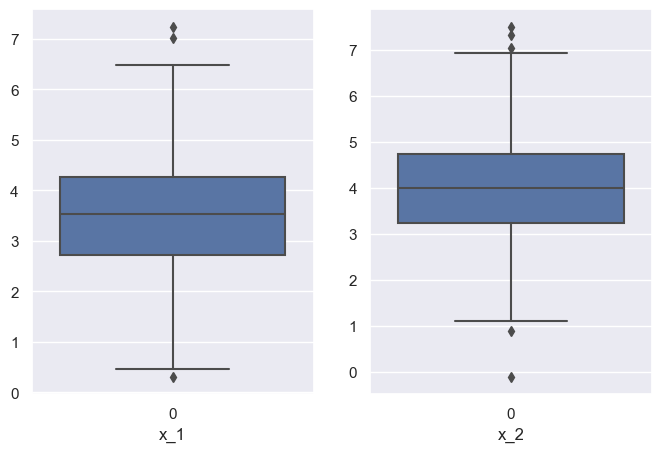

In [101]:

plt.subplot(1, 2 ,1)
sns.boxplot(df.x_1)
plt.xlabel("x_1")


plt.subplot(1, 2 ,2)
sns.boxplot(df.x_2)
plt.xlabel("x_2")
plt.show()

In [102]:
df.drop(df[(df.x_1 > upper_limit_1) | (df.x_1 < lower_limit_1)|(df.x_2< lower_limit_2)].index,inplace=True)

df_1 = df[df.y==1]
df_0 = df[df.y==0]

# TRAINING THE DATA 


## ALGORITHM 1 : LOGISTIC REGRESSION

### Training and Prediction

In [103]:
X_train = df.drop(columns = ["y"])
X_test = df_test.drop(columns = ["y"])

In [104]:
y_train = df["y"]
y_test = df_test["y"]

In [105]:
X_train

,x_1,x_2
0,3.759481,7.507940
1,3.422057,4.991203
2,2.778818,4.112071
3,4.018066,5.653732
4,1.806062,4.685966
...,...,...
795,4.328355,3.673261
796,3.167061,2.956635
797,3.544105,2.649879
798,2.575461,2.517255


In [106]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def gradient_decent(X,y,alpha,reg):
    X=np.array(X)
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights - alpha*(np.dot((y_hat-y),X)+ reg * weights/X.shape[0])
        
        
    return weights  

def predictLR(X, weights):
    y=[]
    for i in X.index :
        if (weights[0]+ X.x_1[i]*weights[1] +X.x_2[i]*weights[2]) > 0.5:
            y.append(1)
        else: y.append(0)
    y=np.array(y)
    
    return y
    

In [107]:
weights  =  gradient_decent(X_test, y_test,0.1,0.01)

y_myPredLR = predictLR(X_test, weights)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,f1_score
print("Accuracy",accuracy_score(y_test,y_myPredLR ))
print("Recall",recall_score(y_test,y_myPredLR ))
print("Precision",np.round(precision_score(y_test,y_myPredLR ),2))
print("F1",np.round(f1_score(y_test,y_myPredLR ),2))

Accuracy 0.9
Recall 0.9
Precision 0.9
F1 0.9


### Hyperparameter Tuning

In [109]:
for alpha in [0.05,0.1,.15,0.2]:
    for reg in [0.01,0.02,0.03,0.05]:
        weights  =  gradient_decent(X_test, y_test,alpha,reg)
        y_myPredLR = predictLR(X_test, weights)
        
        print("alpha :", alpha , "reg:", reg ," -> " ,"A",accuracy_score(y_test,y_myPredLR )," ","F1",np.round(f1_score(y_test,y_myPredLR ),2))
        
        

alpha : 0.05 reg: 0.01  ->  A 0.89   F1 0.9
alpha : 0.05 reg: 0.02  ->  A 0.91   F1 0.91
alpha : 0.05 reg: 0.03  ->  A 0.91   F1 0.91
alpha : 0.05 reg: 0.05  ->  A 0.91   F1 0.91
alpha : 0.1 reg: 0.01  ->  A 0.9   F1 0.9
alpha : 0.1 reg: 0.02  ->  A 0.9   F1 0.9
alpha : 0.1 reg: 0.03  ->  A 0.91   F1 0.91
alpha : 0.1 reg: 0.05  ->  A 0.91   F1 0.91
alpha : 0.15 reg: 0.01  ->  A 0.91   F1 0.91
alpha : 0.15 reg: 0.02  ->  A 0.91   F1 0.91
alpha : 0.15 reg: 0.03  ->  A 0.91   F1 0.91
alpha : 0.15 reg: 0.05  ->  A 0.91   F1 0.91
alpha : 0.2 reg: 0.01  ->  A 0.91   F1 0.91
alpha : 0.2 reg: 0.02  ->  A 0.9   F1 0.9
alpha : 0.2 reg: 0.03  ->  A 0.91   F1 0.91
alpha : 0.2 reg: 0.05  ->  A 0.9   F1 0.9


In [110]:
weights  =  gradient_decent(X_test, y_test,0.15,0.03)

y_myPredLR = predictLR(X_test, weights)

print("Accuracy",accuracy_score(y_test,y_myPredLR ))
print("Recall",recall_score(y_test,y_myPredLR ))
print("Precision",np.round(precision_score(y_test,y_myPredLR ),2))
print("F1",np.round(f1_score(y_test,y_myPredLR ),2))

Accuracy 0.91
Recall 0.92
Precision 0.9
F1 0.91


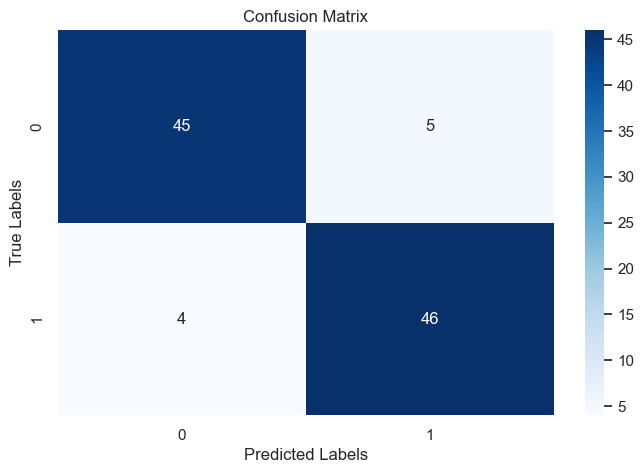

In [111]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_myPredLR )

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Comparison with Scikit-Learn

In [112]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_Lr=lor.predict(X_test)

In [114]:
print("Accuracy",accuracy_score(y_test,y_Lr))
print("Recall",recall_score(y_test,y_Lr ))
print("Precision",np.round(precision_score(y_test,y_Lr ),2))
print("F1",np.round(f1_score(y_test,y_Lr),2))

Accuracy 0.9
Recall 0.88
Precision 0.92
F1 0.9


### Hyperparameter Tuning using GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1,0.5, 1.0,5,10.0],
    'solver': ['liblinear', 'lbfgs']
}


grid_search = GridSearchCV(lor, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_test, y_test)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (Accuracy): 0.93


In [116]:
lor =LogisticRegression(C=0.1,penalty='l1', solver ='liblinear' )

In [117]:
lor.fit(X_train,y_train)
y_Lr=lor.predict(X_test)


print("Accuracy",accuracy_score(y_test,y_Lr))
print("Recall",recall_score(y_test,y_Lr ))
print("Precision",np.round(precision_score(y_test,y_Lr ),2))
print("F1",np.round(f1_score(y_test,y_Lr),2))

Accuracy 0.91
Recall 0.86
Precision 0.96
F1 0.91


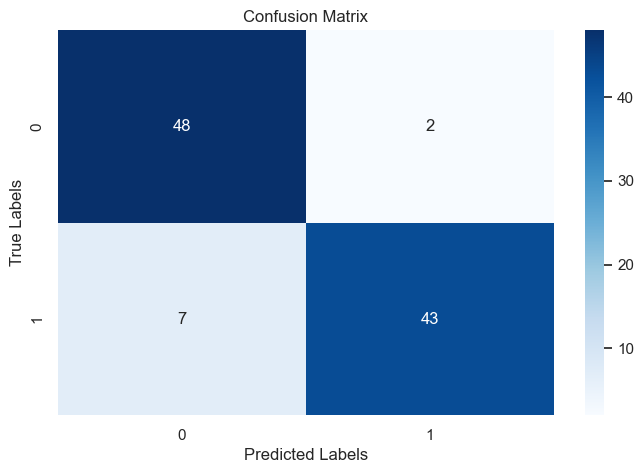

In [118]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_Lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ALGORITHM 2  : Gaussian Naive Bayes

### Training and Prediction

In [119]:
mean_x_1_1 = df_1.x_1.mean()
mean_x_1_0 = df_0.x_1.mean()

mean_x_2_1=df_1.x_2.mean()
mean_x_2_0=df_0.x_2.mean()

In [120]:
std_x_1_1 =  df_1.x_1.std()
std_x_1_0  = df_0.x_1.std()

std_x_2_1=df_1.x_2.std()
std_x_2_0=df_0.x_2.std()

In [121]:
prob0= df_0.shape[0]/df.shape[0]
prob1= df_1.shape[0]/df.shape[0]

In [122]:
def Gprobability(x,mean, std):
    return  (1/(std * np.sqrt(2*np.pi)))*np.exp(-0.5*np.square(x-mean/std))

def GNB(x1 , x2):
    probability0 = prob0*Gprobability(x1,mean_x_1_0, std_x_1_0)*Gprobability(x2,mean_x_2_0,std_x_2_0)
    probability1 = prob1*Gprobability(x1,mean_x_1_1, std_x_1_1)*Gprobability(x2,mean_x_2_1,std_x_2_1)
    
    if probability0 >= probability1: return 0
    else : return 1 

def PredictGNB(X):
    y_mypredGNB=[]
    for i in df_test.index:
        y_mypredGNB.append(GNB(X.x_1[i], X.x_2[i]))
        
    y_mypredGNB = np.array(y_mypredGNB)
    return  y_mypredGNB

In [123]:
y_mypredGNB=PredictGNB(X_test)

In [124]:
print("Accuracy",accuracy_score(y_test,y_mypredGNB))
print("Recall",recall_score(y_test,y_mypredGNB ))
print("Precision",np.round(precision_score(y_test,y_mypredGNB ),2))
print("F1",np.round(f1_score(y_test,y_mypredGNB),2))

Accuracy 0.93
Recall 0.94
Precision 0.92
F1 0.93


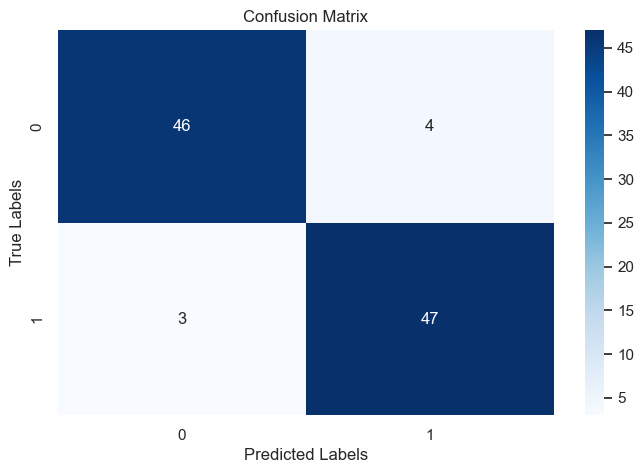

In [125]:

cm = confusion_matrix(y_test,y_mypredGNB)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Comparison with Scikit-Learn

In [126]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [127]:
y_SKpredGNB = nb.predict(X_test)

In [128]:
print("Accuracy",accuracy_score(y_test,y_SKpredGNB))
print("Recall",recall_score(y_test,y_SKpredGNB ))
print("Precision",np.round(precision_score(y_test,y_SKpredGNB ),2))
print("F1",np.round(f1_score(y_test,y_SKpredGNB),2))

Accuracy 0.92
Recall 0.92
Precision 0.92
F1 0.92


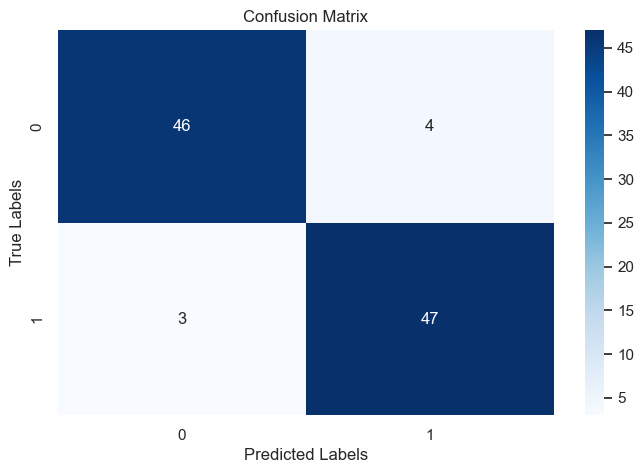

In [129]:

cm = confusion_matrix(y_test,y_mypredGNB)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()